In [1]:
import gensim
from gensim.models import Word2Vec
import json
import gensim.downloader as api
from sklearn.cluster import DBSCAN
from pyclustering.cluster.dbscan import dbscan
import numpy as np

import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA

## Read the sentences list

In [2]:
sentences = []
with open('../../Preprocess_venue/venues_unique.json', 'r') as f:
    sentences = json.loads(f.read())
print(len(sentences))

3643


In [3]:
word_vectors_model = api.load('glove-wiki-gigaword-100')

In [4]:
X = []
wrong_words = 0
total_words = 0
len_lower = 0

for sentence in sentences:
    word_vector = []
    
    for word in sentence:
        total_words += 1
        try:
            word_vector.append(word_vectors_model[word])
        except:
            wrong_words += 1
    leng = len(word_vector)
    
    avg_vect = np.zeros(100)    
    if (leng > 0):
        for elem in word_vector:
            for i in range(0,100):
                avg_vect[i] += elem[i]
        
        if (leng != 1):
            for i in range(0,100):
                avg_vect[i] /= leng 
        
        X.append(avg_vect)    

In [5]:
print(total_words)
print(len(X))
print(wrong_words)
print(len_lower)

10689
3593
234
0


In [6]:
X = np.array(X)
np.save('X1.npy', X) 

## Apply DBScan

In [38]:
eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:
        clustering = DBSCAN(eps=eps[i], min_samples=min_s).fit(X)
        l = []
        cl = clustering.labels_
        min_ones = 0
        for element in cl:
            if element == -1:
                min_ones = min_ones + 1
            else:
                if element not in l:
                    l.append(element)
        print('eps=' + str(eps[i]) + ' min_s=' + str(min_s) + ' nr_clusters=' + str(len(l)) + ' nr_-1=' + str(min_ones))
        min_s = min_s + 1
    i = i + 1

eps=1.0 min_s=1 nr_clusters=3219 nr_-1=0
eps=1.0 min_s=2 nr_clusters=50 nr_-1=3169
eps=1.0 min_s=3 nr_clusters=5 nr_-1=3259
eps=1.0 min_s=4 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=5 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=7 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=8 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=9 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=1 nr_clusters=3196 nr_-1=0
eps=1.1 min_s=2 nr_clusters=68 nr_-1=3128
eps=1.1 min_s=3 nr_clusters=8 nr_-1=3248
eps=1.1 min_s=4 nr_clusters=2 nr_-1=3266
eps=1.1 min_s=5 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=7 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=8 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=9 nr_clusters=1 nr_-1=3272
eps=1.2 min_s=1 nr_clusters=3133 nr_-1=0
eps=1.2 min_s=2 nr_clusters=111 nr_-1=3022
eps=1.2 min_s=3 nr_clusters=22 nr_-1=3200
eps=1.2 min_s=4 nr_clusters=4 nr_-1=3258
eps=1.2 min_s=5 nr_clusters=2 nr_-1=3267
eps=1.2 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.2 min

eps=3.2 min_s=4 nr_clusters=1 nr_-1=76
eps=3.2 min_s=5 nr_clusters=1 nr_-1=80
eps=3.2 min_s=6 nr_clusters=1 nr_-1=80
eps=3.2 min_s=7 nr_clusters=1 nr_-1=85
eps=3.2 min_s=8 nr_clusters=1 nr_-1=87
eps=3.2 min_s=9 nr_clusters=1 nr_-1=90
eps=3.3 min_s=1 nr_clusters=49 nr_-1=0
eps=3.3 min_s=2 nr_clusters=3 nr_-1=46
eps=3.3 min_s=3 nr_clusters=1 nr_-1=50
eps=3.3 min_s=4 nr_clusters=1 nr_-1=54
eps=3.3 min_s=5 nr_clusters=1 nr_-1=55
eps=3.3 min_s=6 nr_clusters=1 nr_-1=55
eps=3.3 min_s=7 nr_clusters=1 nr_-1=55
eps=3.3 min_s=8 nr_clusters=1 nr_-1=55
eps=3.3 min_s=9 nr_clusters=1 nr_-1=57
eps=3.4 min_s=1 nr_clusters=36 nr_-1=0
eps=3.4 min_s=2 nr_clusters=3 nr_-1=33
eps=3.4 min_s=3 nr_clusters=1 nr_-1=37
eps=3.4 min_s=4 nr_clusters=1 nr_-1=39
eps=3.4 min_s=5 nr_clusters=1 nr_-1=40
eps=3.4 min_s=6 nr_clusters=1 nr_-1=40
eps=3.4 min_s=7 nr_clusters=1 nr_-1=41
eps=3.4 min_s=8 nr_clusters=1 nr_-1=41
eps=3.4 min_s=9 nr_clusters=1 nr_-1=41
eps=3.5 min_s=1 nr_clusters=29 nr_-1=0
eps=3.5 min_s=2 nr_cluste

KeyboardInterrupt: 

## Test DBScan

In [52]:
clustering = DBSCAN(eps=3.7, min_samples=1).fit(X)
cl = clustering.labels_

# Gaseste numarul de clustere
clust = []
noise = 0

for elem in cl: 
    if elem == -1:
        noise += 1
    else:
        if elem not in clust:
            clust.append(elem)

clustere = np.zeros(len(clust), dtype=np.int64)     
for elem in cl:
    if not ( elem == -1):
        clustere[elem] += 1 
        
print(clustere)

[3629    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]


## Apply DBScan 2

In [53]:
sample = X

eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:

        dbscan_instance = dbscan(sample, eps[i], min_s)
        dbscan_instance.process()
        clusters = dbscan_instance.get_clusters()
        noise = dbscan_instance.get_noise()
        print(str(eps[i]) + ' ' + str(min_s) + ' clusters=' + str(len(clusters)) + ' noise=' + str(len(noise)))
        min_s += 1
    
    i += 1


1.0 1 clusters=50 noise=3169
1.0 2 clusters=5 noise=3259
1.0 3 clusters=1 noise=3272
1.0 4 clusters=1 noise=3272
1.0 5 clusters=1 noise=3272
1.0 6 clusters=1 noise=3272
1.0 7 clusters=1 noise=3272
1.0 8 clusters=1 noise=3272
1.0 9 clusters=1 noise=3272
1.1 1 clusters=68 noise=3128
1.1 2 clusters=8 noise=3248
1.1 3 clusters=2 noise=3266
1.1 4 clusters=1 noise=3272
1.1 5 clusters=1 noise=3272
1.1 6 clusters=1 noise=3272
1.1 7 clusters=1 noise=3272
1.1 8 clusters=1 noise=3272
1.1 9 clusters=1 noise=3272
1.2 1 clusters=111 noise=3022
1.2 2 clusters=22 noise=3200
1.2 3 clusters=4 noise=3258
1.2 4 clusters=2 noise=3267
1.2 5 clusters=1 noise=3272
1.2 6 clusters=1 noise=3272
1.2 7 clusters=1 noise=3272
1.2 8 clusters=1 noise=3272
1.2 9 clusters=1 noise=3272
1.3 1 clusters=141 noise=2927
1.3 2 clusters=33 noise=3143
1.3 3 clusters=11 noise=3220
1.3 4 clusters=4 noise=3251
1.3 5 clusters=3 noise=3260
1.3 6 clusters=1 noise=3272
1.3 7 clusters=1 noise=3272
1.3 8 clusters=1 noise=3272
1.3 9 clust

KeyboardInterrupt: 

## Test DBScan 2

In [157]:
dbscan_instance = dbscan(sample, 2.5, 2)
dbscan_instance.process()
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()

clust = np.zeros(len(clusters))
index = 0
for elem in clusters:
    print(index, len(elem))
    index += 1

0 2434
1 5
2 8
3 3
4 3
5 3


## OPTICS Algorithm

In [67]:
from pyclustering.cluster.optics import optics
from pyclustering.cluster import cluster_visualizer

# Read sample for clustering from some file.
sample = X

# Run cluster analysis where connectivity radius is bigger than real.
radius = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
        1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]

i = 0
while i < 100:
    neighbors = 1
    while neighbors < 10:
        optics_instance = optics(sample, radius[i], neighbors)

        # Performs cluster analysis.
        optics_instance.process()

        # Obtain results of clustering.
        clusters = optics_instance.get_clusters()
        noise = optics_instance.get_noise()
        print ( str(radius[i]) + " " + str(neighbors) + " " + str(len(clusters)) + " " + str(len(noise)))
        neighbors += 1
    i += 1

0.1 1 32 3209
0.1 2 2 3269
0.1 3 1 3272
0.1 4 1 3272
0.1 5 1 3272
0.1 6 1 3272
0.1 7 1 3272
0.1 8 1 3272
0.1 9 1 3272
0.2 1 32 3209
0.2 2 2 3269
0.2 3 1 3272
0.2 4 1 3272
0.2 5 1 3272
0.2 6 1 3272
0.2 7 1 3272
0.2 8 1 3272
0.2 9 1 3272
0.3 1 32 3209
0.3 2 2 3269
0.3 3 1 3272
0.3 4 1 3272
0.3 5 1 3272
0.3 6 1 3272
0.3 7 1 3272
0.3 8 1 3272
0.3 9 1 3272
0.4 1 32 3209
0.4 2 2 3269
0.4 3 1 3272
0.4 4 1 3272
0.4 5 1 3272
0.4 6 1 3272
0.4 7 1 3272
0.4 8 1 3272
0.4 9 1 3272
0.5 1 32 3209
0.5 2 2 3269
0.5 3 1 3272
0.5 4 1 3272
0.5 5 1 3272
0.5 6 1 3272
0.5 7 1 3272
0.5 8 1 3272
0.5 9 1 3272
0.6 1 32 3209
0.6 2 2 3269
0.6 3 1 3272
0.6 4 1 3272
0.6 5 1 3272
0.6 6 1 3272
0.6 7 1 3272
0.6 8 1 3272
0.6 9 1 3272
0.7 1 34 3205
0.7 2 2 3269
0.7 3 1 3272
0.7 4 1 3272
0.7 5 1 3272
0.7 6 1 3272
0.7 7 1 3272
0.7 8 1 3272
0.7 9 1 3272
0.8 1 36 3201
0.8 2 2 3269
0.8 3 1 3272
0.8 4 1 3272
0.8 5 1 3272
0.8 6 1 3272
0.8 7 1 3272
0.8 8 1 3272
0.8 9 1 3272
0.9 1 41 3190
0.9 2 3 3267
0.9 3 1 3272
0.9 4 1 3272
0.9

KeyboardInterrupt: 

## Test OPTICS

In [77]:
optics_instance = optics(sample, 2.9, 1)
#2.5 1
#2.5 2
#2.6 1
#2.7 1
#2.8 1
#2.9 1 

# Performs cluster analysis.
optics_instance.process()

# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

print(len(clusters))
print(len(noise))
l_clusters = []
for elem in clusters:
    l_clusters.append(len(elem))
print(l_clusters)

13
176
[3440, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Apply Hierarchical Clustering

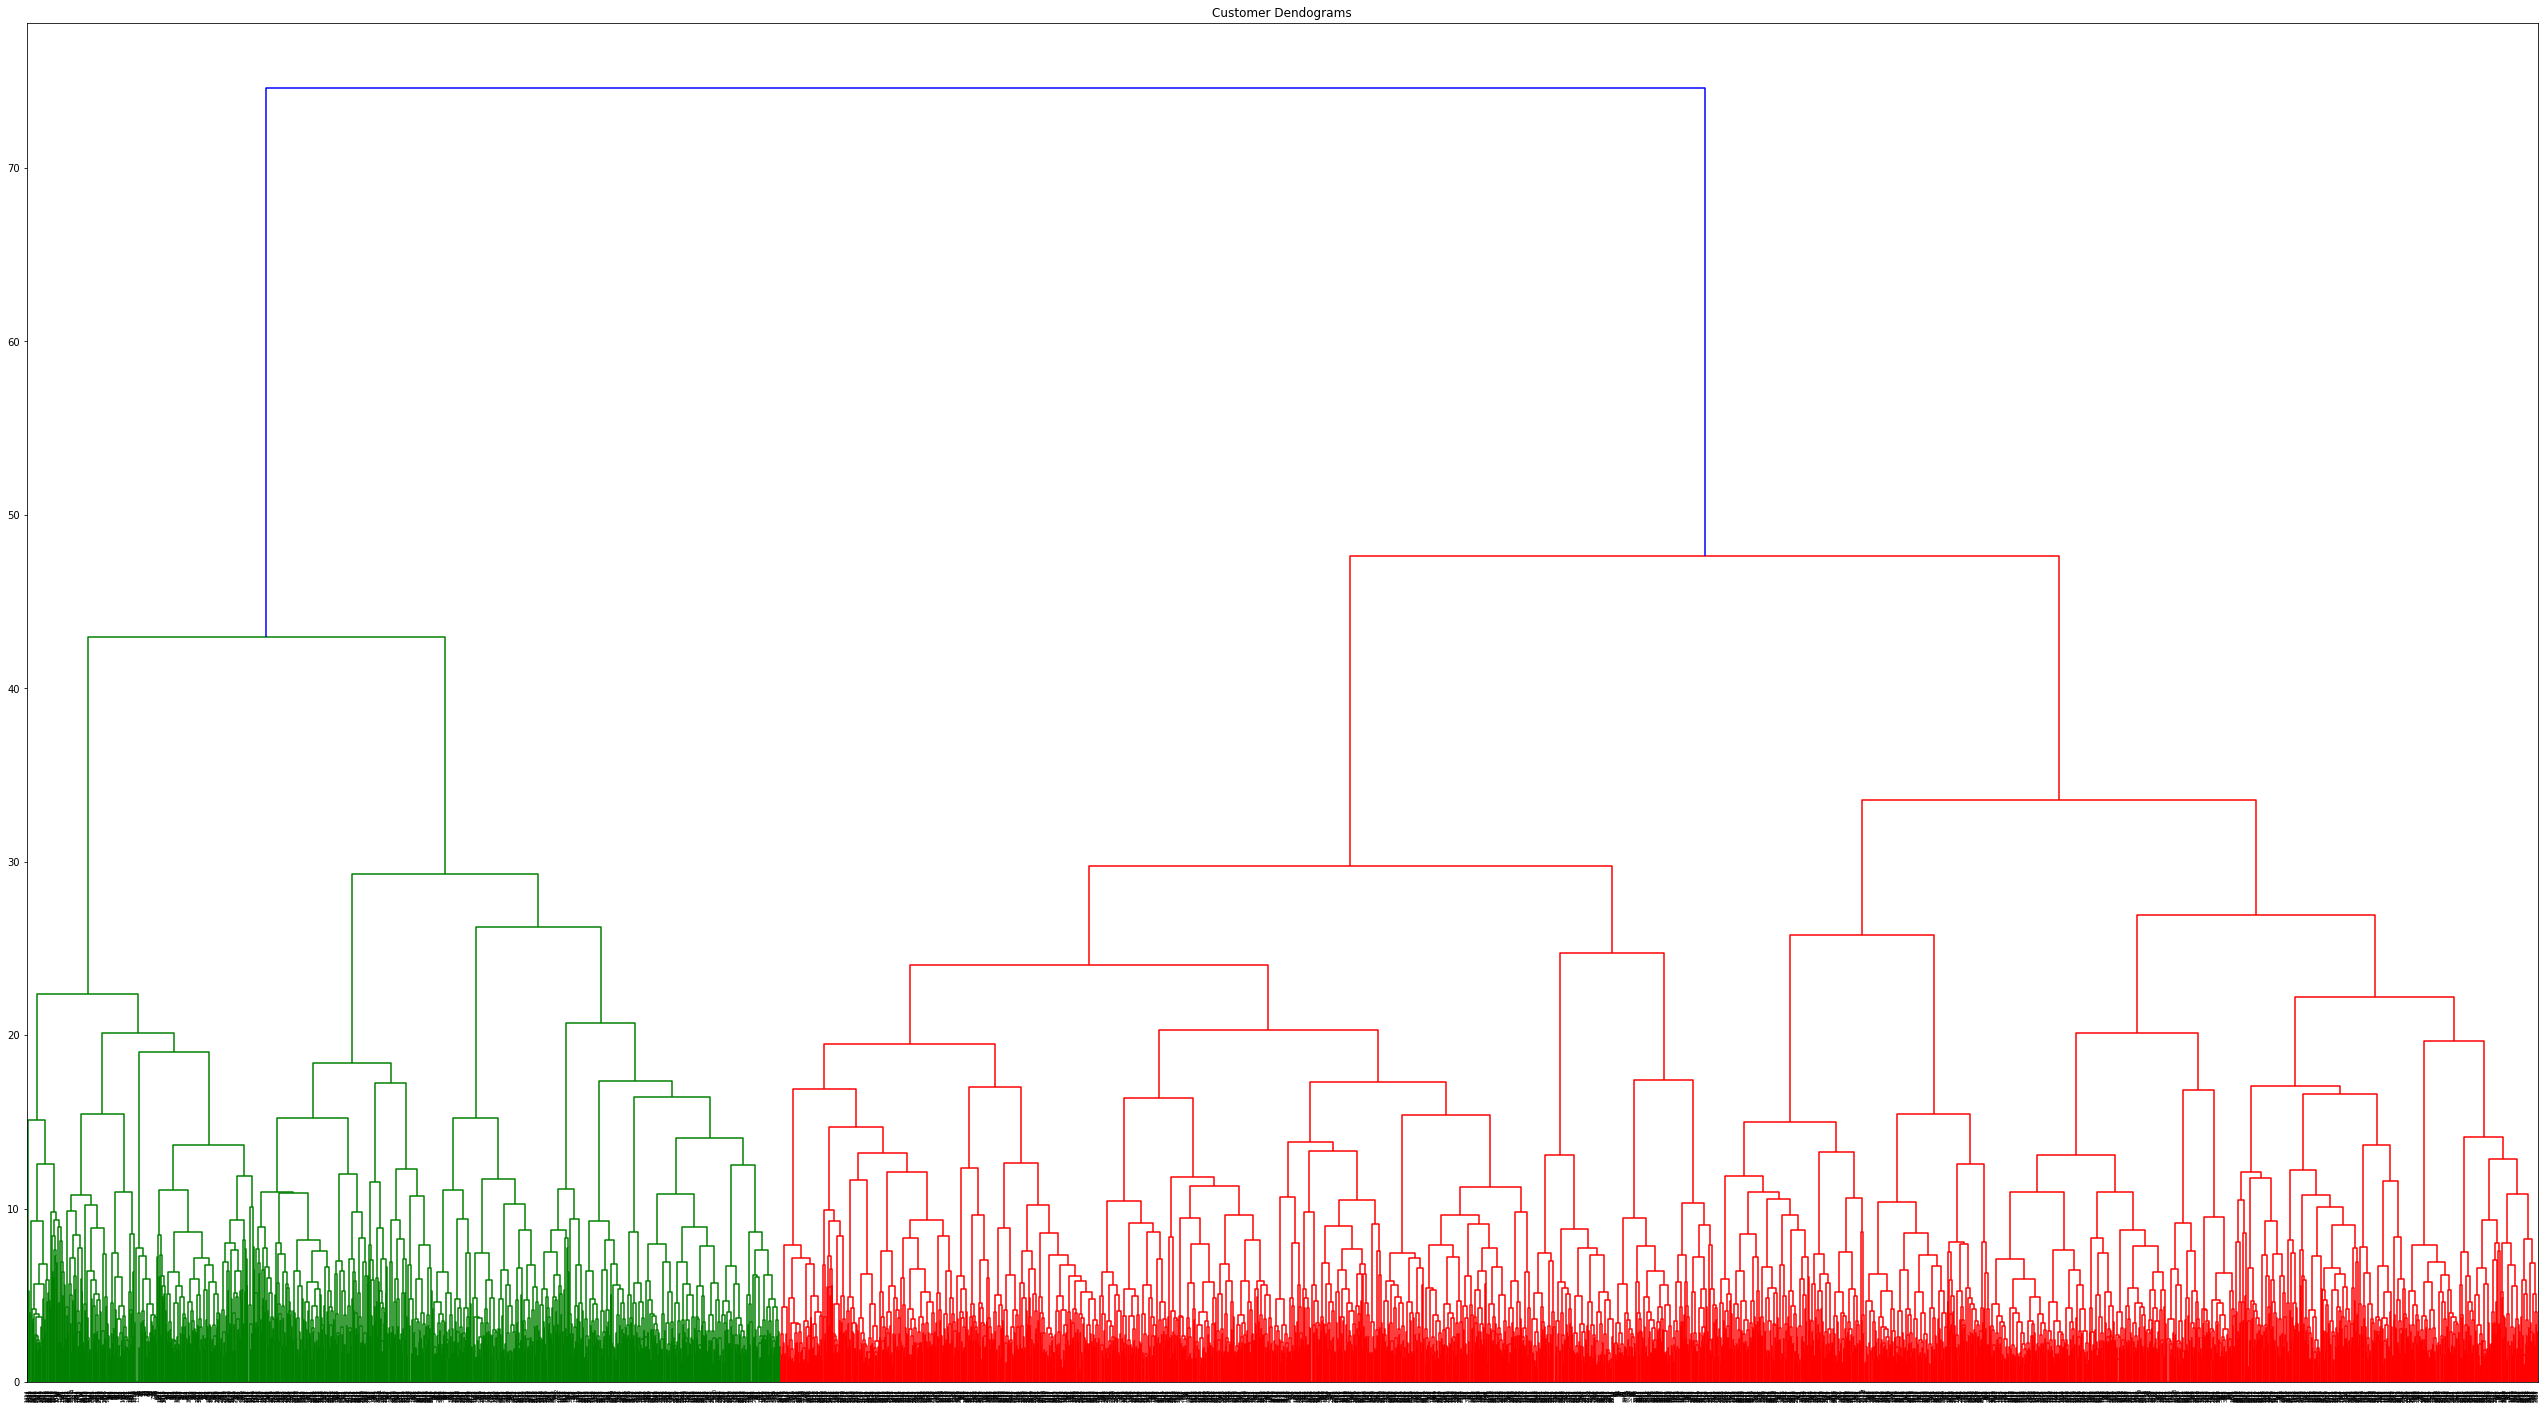

In [9]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt 
data = X
plt.figure(figsize=(45, 25))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

## Apply Agglomerative Clustering

Line 1 -> 7 classes  
Line 2 -> 14 classes  
Line 3 -> 22 classes  
Line 4 -> 33 classes  
Line 5 -> 35 classes  
Line 6 -> 51 classes  

In [94]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
result_labels = cluster.fit_predict(X) 

In [95]:
with open("./c2/cl2.tsv", "w") as f:
    strline = ""
    for elem in result_labels:
        strline +=  (str(elem+10) + "\n")
    print(str(strline), file=f)
    
print(result_labels) 

[1 1 1 ... 0 1 0]


## Pentru Tensorboard

In [97]:
pca = sklearnPCA(n_components=20) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

In [99]:
PATH = os.getcwd()

LOG_DIR = PATH + '/c2/'

metadata = os.path.join(LOG_DIR, 'cl2.tsv')

pca = sklearnPCA(n_components=50) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    
    embedding.metadata_path = metadata
    
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

In [52]:
print(len(X))
print(len(result_labels))

3593
3593


In [46]:
print(result_labels[3582:])

[0 0 0 5 0 0 1 5 5 2 1]


## Write clusters to files

In [ ]:
nrClusters = 14
